## Branchwater output comparison
Branchwater x 14 spp that were in 99% of the pig gut metagenomes
Seem to be core spp. How predictive are they together or in combination that something is a pig, or pig related?

Have:
- Presence absence matrix with sample,species, 0/1
- df with for each sample what the host is 

In [295]:
import pandas as pd


In [286]:
df = pd.read_csv('../../2025-pig-binning-paper/250830-branchwater/251001_presence_absence.branchw.csv')
df2 = pd.read_csv('../../2025-pig-binning-paper/250830-branchwater/251001_merged.branchwater.csv')
#df2['assay_type'].value_counts()

In [287]:
df['metag_count'] = df.iloc[:, 1:].sum(axis=1)
df = df[df['metag_count'] != 0]


In [288]:
df['metag_count'].value_counts()

metag_count
1     43497
2     18473
3      8841
4      4260
14     2499
5      2279
13     1613
6      1413
12     1337
7      1070
11      966
8       938
9       872
10      867
Name: count, dtype: int64

In [289]:
df = df.merge(df2, on='acc', how='left')


In [290]:
df = df[df['assay_type'] == 'WGS']


In [291]:
df['organism'].value_counts()

organism
human gut metagenome        37643
gut metagenome               9216
metagenome                   7257
pig gut metagenome           5906
feces metagenome             3312
                            ...  
uncultured bacterium            1
human vaginal metagenome        1
Alistipes onderdonkii           1
Caenorhabditis elegans          1
seagrass metagenome             1
Name: count, Length: 197, dtype: int64

In [292]:
df = df[['metag_count', 'acc', 'organism']]

In [293]:
df = df[df['organism'].str.contains('metagenome', case=False, na=False)]


In [294]:
df.to_csv('../../2025-pig-binning-paper/250830-branchwater/251001_metagenome_assigned.csv')

In [266]:
import pandas as pd

# Keep only the columns we care about
df_sub = df[['metag_count', 'organism']]

# Drop rows where metag_count is 0, if needed
df_sub = df_sub[df_sub['metag_count'] != 0]

# Use pd.crosstab to get counts
df_pivot = pd.crosstab(df_sub['organism'], df_sub['metag_count']).reset_index()

# Optional: rename columns nicely
df_pivot.columns = ['organism'] + [str(col) for col in df_pivot.columns[1:]]


In [268]:


category_map = {
    'human': ['human', 'homo', 'sapiens'],
    'pig': ['pig', 'sus', 'scrofa'],
    'other_mammal': ['cow', 'bovine', 'bos','musculus', 'mouse', 'rat','canine', 'feline'],
    'poultry':['chicken', 'poultry', 'gallus'],
    'soil':['sediment', 'soil', 'sludge', 'wetland', 'bog'],
    'bioreactor': ['bioreactor'],
    'water':['water', 'marine']}


# Function to assign category based on keywords
def get_broad_cat(organism):
    for cat, keywords in category_map.items():
        if any(keyword.lower() in str(organism).lower() for keyword in keywords):
            return cat
    return 'other'  # default if no keywords match


df_pivot['broad_cat'] = df_pivot['organism'].apply(get_broad_cat)
df_pivot.loc[df_pivot['organism'].str.lower() == 'metagenome', 'broad_cat'] = 'metagenome'
df_pivot.loc[df_pivot['organism'].str.lower() == 'gut metagenome', 'broad_cat'] = 'gut metagenome'
df_pivot.loc[df_pivot['organism'].str.lower() == 'feces metagenome', 'broad_cat'] = 'feces metagenome'


,organism,1,2,3,4,5,6,7,8,9,10,11,12,13,14,broad_cat
0,activated sludge metagenome,11,2,3,0,1,0,1,0,0,0,0,0,0,0,soil
1,aerosol metagenome,1,1,0,0,0,0,0,0,0,0,0,0,0,0,other
2,air metagenome,13,18,0,1,0,3,3,0,0,2,7,2,1,19,other
3,anaerobic digester metagenome,6,4,0,0,0,1,2,1,4,2,4,11,0,0,other
4,aquatic metagenome,10,2,5,0,1,3,0,2,0,0,0,0,0,0,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,terrestrial metagenome,2,6,0,2,2,6,0,2,1,5,6,0,1,0,other
94,upper respiratory tract metagenome,0,1,0,1,0,0,0,0,0,0,0,0,0,0,other_mammal
95,viral metagenome,10,4,1,0,0,1,1,1,0,0,0,0,0,0,other
96,wastewater metagenome,360,408,239,200,108,84,91,64,65,12,10,7,14,16,water


In [269]:
# Automatically select all numeric columns
numeric_cols = df_pivot.select_dtypes(include='number').columns.tolist()

# Group by broad_cat and sum numeric columns
df_grouped = df_pivot.groupby('broad_cat')[numeric_cols].sum().reset_index()


In [270]:
df_grouped

,broad_cat,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,bioreactor,23,19,4,4,4,6,3,4,4,3,1,2,9,23
1,feces metagenome,1367,650,366,209,128,91,91,81,52,35,30,48,79,85
2,gut metagenome,4965,2156,738,306,214,147,107,71,49,43,48,46,211,115
3,human,21765,9610,4945,2323,1036,575,357,238,184,65,30,1,0,0
4,metagenome,3648,1719,737,337,206,100,66,47,20,31,16,24,163,143
5,other,465,203,52,14,12,21,19,14,27,20,30,24,17,96
6,other_mammal,2416,204,104,32,29,27,21,10,12,31,25,30,7,0
7,pig,86,137,196,151,156,169,199,310,371,507,613,995,765,1681
8,poultry,445,706,3,0,2,1,0,1,0,0,0,1,0,0
9,soil,486,38,36,18,1,0,1,0,2,1,4,15,173,6


In [228]:
df_pivot.to_csv('test.csv')

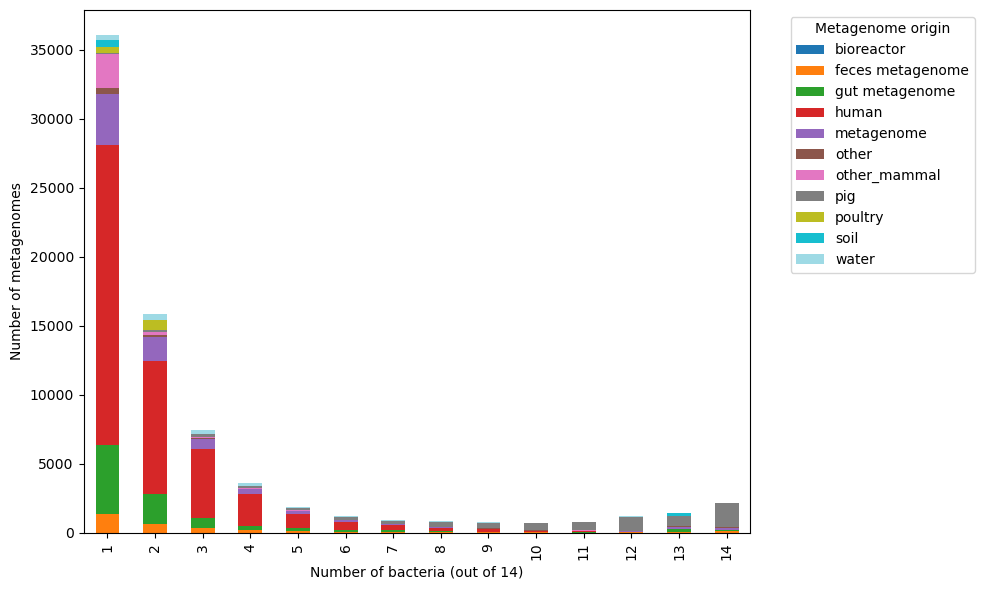

In [277]:
# make chart with absolute numbers
numeric_cols = df_grouped.select_dtypes(include='number').columns.tolist()

df_abs = df_grouped.set_index('broad_cat')[numeric_cols]
ax = df_abs.T.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')
ax.set_ylabel('Number of metagenomes')
ax.set_xlabel('Number of bacteria (out of 14)')

plt.legend(title='Metagenome origin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
#plt.show()
plt.savefig('../plots/251001_absolute_metag.branchwater.png')


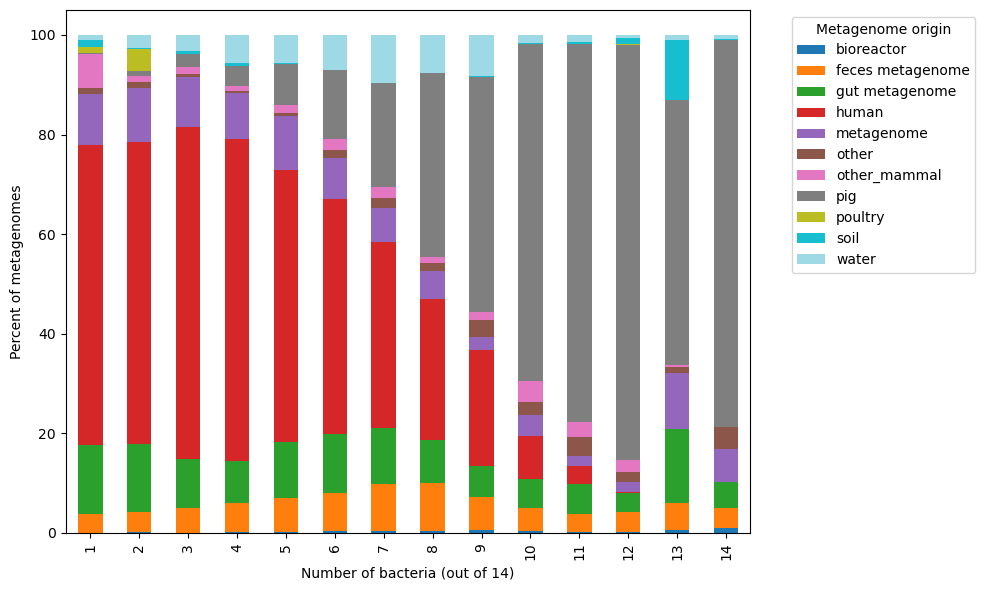

In [276]:

# Automatically select numeric columns
numeric_cols = df_grouped.select_dtypes(include='number').columns.tolist()

# Normalize each column to sum to 100%
df_norm = df_grouped.set_index('broad_cat')[numeric_cols].div(df_grouped[numeric_cols].sum(axis=0), axis=1) * 100

# Plot stacked bar chart
ax = df_norm.T.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')
ax.set_ylabel('Percent of metagenomes')
ax.set_xlabel('Number of bacteria (out of 14)')
plt.legend(title='Metagenome origin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('../plots/251001_percent_metag.branchwater.png')


## Manually checked the SRAs for over 11
- Are they pig adjecent?
- Mislabeled?

Most are. Id like to only plot bars 12,13,14 cause those are the ones I man curated

In [342]:
df = pd.read_csv('../../2025-pig-binning-paper/250830-branchwater/251002_samples_over11.csv')

In [343]:
df['metag_count'].value_counts()

metag_count
14    2165
13    1439
12    1193
Name: count, dtype: int64

In [353]:

# Keep only the columns we care about
df_sub = df[['metag_count', 'organism']]

# Drop rows where metag_count is 0, if needed
df_sub = df_sub[df_sub['metag_count'] != 0]

# Use pd.crosstab to get counts
df_pivot = pd.crosstab(df_sub['organism'], df_sub['metag_count']).reset_index()

# Optional: rename columns nicely
df_pivot.columns = ['organism'] + [str(col) for col in df_pivot.columns[1:]]

In [354]:
df_pivot

,organism,12,13,14
0,air metagenome,1,0,2
1,bioreactor - pig manure,2,8,23
2,bioreactor metagenome,0,0,1
3,bovine gut metagenome,48,31,20
4,chicken gut,1,0,0
5,human gut,3,5,1
6,lichen metagenome,0,0,1
7,macaque metagenome,4,6,1
8,manure metagenome,3,1,1
9,other_mammal,0,0,1


In [355]:
category_map = {
    'human': ['human', 'homo', 'sapiens'],
    'pig': ['pig', 'sus', 'scrofa', 'swine'],
    'other_mammal': ['cow', 'bovine', 'bos','musculus', 'mouse', 'rat','canine', 'feline'],
    'poultry':['chicken', 'poultry', 'gallus'],
    'soil':['sediment', 'soil', 'sludge', 'wetland', 'bog'],
    'bioreactor': ['bioreactor'],
    'water':['water', 'marine']}


# Function to assign category based on keywords
def get_broad_cat(organism):
    for cat, keywords in category_map.items():
        if any(keyword.lower() in str(organism).lower() for keyword in keywords):
            return cat
    return 'other'  # default if no keywords match


df_pivot['broad_cat'] = df_pivot['organism'].apply(get_broad_cat)
df_pivot.loc[df_pivot['organism'].str.lower() == 'metagenome', 'broad_cat'] = 'metagenome'
df_pivot.loc[df_pivot['organism'].str.lower() == 'gut metagenome', 'broad_cat'] = 'gut metagenome'
df_pivot.loc[df_pivot['organism'].str.lower() == 'feces metagenome', 'broad_cat'] = 'feces metagenome'


In [360]:
df_pivot.loc[df_pivot['organism'].str.lower() == 'pig gut metagenome', 'broad_cat'] = ' pig gut metagenome'
df_pivot.loc[df_pivot['organism'].str.lower() == 'pig or chicken feces', 'broad_cat'] = ' pig or chicken feces'

In [361]:
df_pivot

,organism,12,13,14,broad_cat
0,air metagenome,1,0,2,other
1,bioreactor - pig manure,2,8,23,pig
2,bioreactor metagenome,0,0,1,bioreactor
3,bovine gut metagenome,48,31,20,other_mammal
4,chicken gut,1,0,0,poultry
5,human gut,3,5,1,human
6,lichen metagenome,0,0,1,other
7,macaque metagenome,4,6,1,other
8,manure metagenome,3,1,1,other
9,other_mammal,0,0,1,other


In [362]:
# Automatically select all numeric columns
numeric_cols = df_pivot.select_dtypes(include='number').columns.tolist()

# Group by broad_cat and sum numeric columns
df_grouped = df_pivot.groupby('broad_cat')[numeric_cols].sum().reset_index()

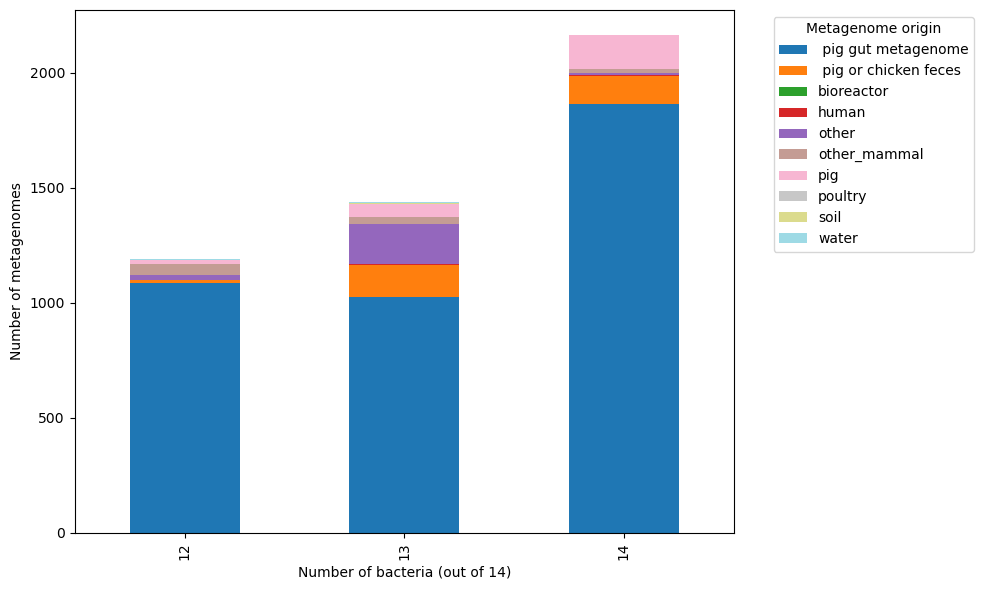

In [363]:
# make chart with absolute numbers
numeric_cols = df_grouped.select_dtypes(include='number').columns.tolist()

df_abs = df_grouped.set_index('broad_cat')[numeric_cols]
ax = df_abs.T.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')
ax.set_ylabel('Number of metagenomes')
ax.set_xlabel('Number of bacteria (out of 14)')

plt.legend(title='Metagenome origin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
#plt.show()
plt.savefig('../plots/251001_absolute_metag.over11.mancur.png')
